In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')
%matplotlib inline

* どのような統計モデルでも利用可能な尤度比検定
* これはネストしたモデルの比較ができる
* 全パラメータの再尤推定ができる統計モデルをパラメトリックな統計モデルと総称できるかもしれません？
* 比較的少数のパラメータをもつという意味
* 順序統計量をつかった検定をノンパラメトリック検定と呼ぶ場合があります（が、この本では取り扱わない

## 5.1統計学的な検定のわくぐみ

* 帰無仮説、対立仮説
* まだよくわからん

## 5.2 尤度比検定の例題: 逸脱度の差を調べる

In [2]:
df = pd.read_csv('../4/data.csv')

In [3]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [11]:
const = sm.add_constant(df['x'])['const']
certain_model = sm.GLM(df['y'], const, family=sm.families.Poisson()).fit()
certain_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 11 Jun 2018   Deviance:                       89.507
Time:                        02:12:51   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [12]:
x_model = sm.GLM(df['y'], sm.add_constant(df['x']), family=sm.families.Poisson()).fit()
x_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 11 Jun 2018   Deviance:                       84.993
Time:                        02:12:57   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

$\frac{\lambda^y * exp(-\lambda)}{y!}$

In [17]:
def x(_x):
    return -2 * _x

-2 * x(certain_model.llf)

-950.5728852371469

In [36]:
-2 * (full_model)

385.7795050489919

In [42]:
def poission_pmf(y, _lambda):
    under = np.prod([i for i in range(1, y + 1)])
    return _lambda ** y * (np.e ** -_lambda) / under


def d2l(x):
    return -2 * x


full_model = np.sum([np.log(poission_pmf(y, _lambda=y)) for y in df['y']])

d = [['一定', 1, certain_model.llf, d2l(certain_model.llf), d2l(certain_model.llf) - (-2 * full_model), certain_model.aic],
        ['x', 2, x_model.llf, d2l(x_model.llf), d2l(x_model.llf) - (-2 * full_model), x_model.aic],
        ['フル', 100, full_model, -2 * full_model, 0.0, (-2 * full_model) +  (2 * 100)]]
d_df = pd.DataFrame(d)
d_df.columns = ['モデル', 'k', 'logL', 'deviance -2log L', 'residual deviance', 'AIC']
d_df.head()

,モデル,k,logL,deviance -2log L,residual deviance,AIC
0,一定,1,-237.643221,475.286443,89.506938,477.286443
1,x,2,-235.386251,470.772502,84.992996,474.772502
2,フル,100,-192.889753,385.779505,0.000000,585.779505


尤度比を求める式

$$
\frac{L_i}{L_2} = \frac{一定のモデルの最大尤度}{xモデルの最大尤度}
$$

でもこれでは使いにくい？ので

$$
\Delta D_{1,2} = -2 * (\log L_i - \log L_2)
$$

として、逸脱度の差を求める

In [44]:
d2l(certain_model.llf) - d2l(x_model.llf)

4.513941078851872

こうすることで？　　

一定のモデルと比べて、xモデルではあてはまりの悪さである逸脱度が4.5改善されたといえる

尤度比検定はこの統計量である逸脱度の差が4.5ぐらいでは改善されていないといってよいのかどうかを調べます

## 5.3 2種類の過誤と統計学的な検定の非対称性

むずい. とりあえず飲み込む　

* 帰無仮説である一定のモデルが正しいと仮定
* 観測データに一定のモデルをあてはめたら、b1=2.06なので、真のモデルはこうである（と仮定
* この真のモデルからデータを何度も生成し、そのたびにb2=0とb2!=0のモデルをあてはめれば、たくさんの逸脱度の差が得られるから分布がわかるはず
* そうすると、一定モデルとxモデルの逸脱度の差が4.5以上となる確率Pが評価できるだろう

いまわからないこと

* なぜ一定のモデルとが帰無仮説で、xモデルが対立仮説？

## 5.4 帰無仮説を棄却するための有意水準

* P値が大きい -> 逸脱度の差4.5はよくあること -> 帰無仮説が棄却できない
* P値が小さい -> 逸脱度の差4.5はとてもめずらしいこと -> 帰無仮説を棄却し、残ったモデルが正しいと主張してやろう

P値が大きいのか小さいのか判断する値は$\alpha = 0.05$である.めったいないことは20回のうち1回よりは少ない発生件数であるといった値が使われるとか。そしてキチンとした理由は誰にも説明できないとか。。。

In [52]:
rpy = np.random.poisson(size=100, lam=7.85)

In [53]:
rpy

array([13, 13,  8, 11, 13, 11,  6, 10,  8,  5,  8, 11,  7,  7,  9,  9,  9,
        7, 10, 10,  9,  6,  3,  2, 11,  6,  9,  7,  9,  5,  7, 13,  5,  8,
        5,  5,  8,  9, 10, 11, 13,  8,  7,  9, 11,  5, 12,  4,  3,  8, 11,
        9,  7,  8,  5,  7, 10,  5,  4,  9,  5, 10, 10,  9,  8,  5,  7, 13,
        5,  9,  6,  4,  4,  3, 10,  9, 10,  8, 12,  6,  9,  5,  6,  6,  3,
        8,  4,  3,  5,  6,  7, 12, 13, 11,  7,  7, 10,  5,  8, 10])

In [56]:
rp_c_model = sm.GLM(rpy, sm.add_constant(df['x'])['const'], family=sm.families.Poisson()).fit()
rp_x_model = sm.GLM(rpy, sm.add_constant(df['x']), family=sm.families.Poisson()).fit()

In [58]:
d2l(rp_c_model.llf) - d2l(rp_x_model.llf)

1.9196044467925617

これを1000回繰り返した方法をPB法（パラメトリックブートストラップ法）というらしい

In [59]:
def pb(_df, _lambda):
    rpy = np.random.poisson(size=100, lam=_lambda)
    rp_c_model = sm.GLM(rpy, sm.add_constant(_df['x'])['const'], family=sm.families.Poisson()).fit()
    rp_x_model = sm.GLM(rpy, sm.add_constant(_df['x']), family=sm.families.Poisson()).fit()
    
    return d2l(rp_c_model.llf) - d2l(rp_x_model.llf)

In [86]:
ds = []
for _ in range(1000):
    ds.append(pb(df, 7.85))

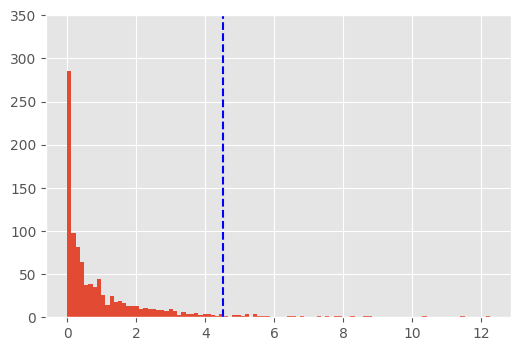

In [95]:
_, ax = plt.subplots()
ax.hist(ds, bins=100)
ax.plot([4.5, 4.5], [0, 500],  color='b', linestyle='dashed')
ax.set_ylim(0, 350)
plt.show()

In [101]:
ds_df = pd.DataFrame(ds)
ds_df.columns = ['a']
ds_df.describe()

,a
count,1000.000000
mean,1.015784
std,1.462517
min,0.000013
25%,0.088392
50%,0.412018
75%,1.349239
max,12.246711


In [103]:
len(ds_df[ds_df['a'] >= 4.5])

35

1000個中、35個が4.5以上ということがわかった -> 35 / 1000

In [104]:
35 /1000

0.035

P=0.035

となる